## Import Libraries

In [47]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Fetch Data

In [48]:
newsgroups = fetch_20newsgroups(subset='all')
newsgroups.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

## Exploratory Data Categories

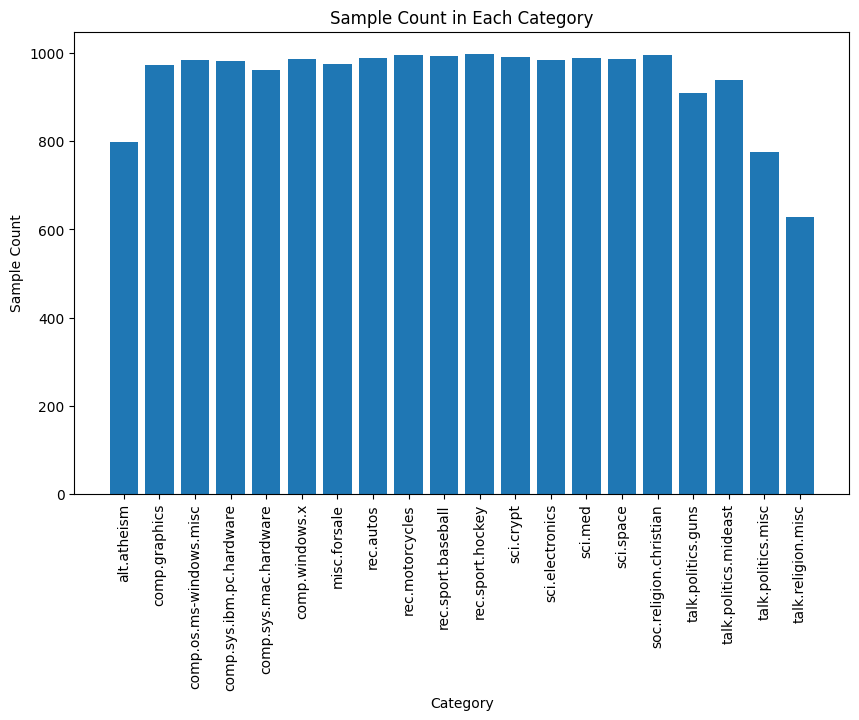

In [49]:
categories = newsgroups.target_names
labels = newsgroups.target
sample_counts = [np.sum(np.where(labels == i, 1, 0)) for i in range(len(categories))]

data = {'Category': categories, 'Sample Count': sample_counts}
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
plt.bar(df['Category'], df['Sample Count'])
plt.title('Sample Count in Each Category')
plt.xlabel('Category')
plt.ylabel('Sample Count')
plt.xticks(rotation=90)

plt.show()

In [50]:
# Feature data (text documents)
X = newsgroups.data

# Target labels
y = newsgroups.target

## TF-IDF

In [51]:
# Convert text data into TF-IDF feature vectors
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X)

# Print the shape of the feature matrix and labels array
print(X_vec.shape, y.shape)

(18846, 173762) (18846,)


## Split Data

In [58]:
# Split the dataset into training and testing sets (80% training, 20% testing)
split = int(X_vec.shape[0] * 0.8)
X_train = X_vec[:split]
X_test = X_vec[split:]
y_train = y[:split]
y_test = y[split:]

In [59]:
# Check the shape and data types of the training and test sets
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (15076, 173762)
y_train shape: (15076,)
X_test shape: (3770, 173762)
y_test shape: (3770,)


## Sampling

In [56]:
# Train on a smaller subset of the data
# subset_size = 10000
# X_train_sample = X_train[:subset_size]
# y_train_sample = y_train[:subset_size]

## Linear SVM Model

In [60]:
from tqdm import tqdm

# Create and train the SVM classifier
clf = SVC(kernel='linear')
# clf.fit(X_train_sample, y_train_sample)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Calculate accuracy, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy * 100:.3f}%")

recall = recall_score(y_test, y_pred, average='macro')
print(f"SVM Recall: {recall * 100:.3f}%")

f1 = f1_score(y_test, y_pred, average='macro')
print(f"SVM F1: {f1 * 100:.3f}%")


SVM Accuracy: 91.751%
SVM Recall: 91.508%
SVM F1: 91.650%


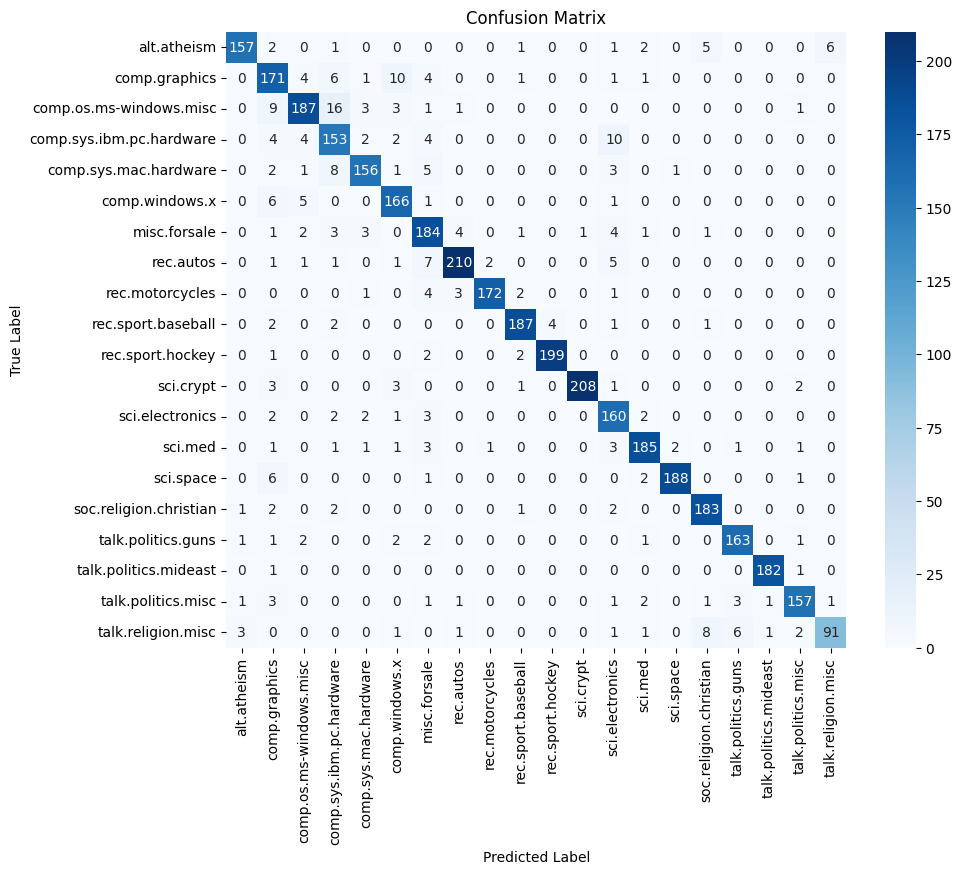

In [61]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=newsgroups.target_names, yticklabels=newsgroups.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()